Steps to take

preprocess data
- stemming & lemmatization
- Tokenisation
- REGEX
- Stopwords removal
- Feature Engineering


In [217]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt

import nltk
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer


from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, plot_confusion_matrix
from sklearn import metrics

In [218]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/davidboyd/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/davidboyd/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [219]:
df = pd.read_csv('Data/tweets_dataset.csv')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [221]:
list = ['emotion_in_tweet_is_directed_at','is_there_an_emotion_directed_at_a_brand_or_product']

for item in list:
    print(f'The column name is {item}')
    print(df[item].unique())
    print(df[item].value_counts())

The column name is emotion_in_tweet_is_directed_at
['iPhone' 'iPad or iPhone App' 'iPad' 'Google' nan 'Android' 'Apple'
 'Android App' 'Other Google product or service'
 'Other Apple product or service']
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64
The column name is is_there_an_emotion_directed_at_a_brand_or_product
['Negative emotion' 'Positive emotion'
 'No emotion toward brand or product' "I can't tell"]
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, 

In [222]:
## Removing the records which have an unknown sentiment option - Keeping the options to just Positive, Negative & Neutral
df = df[~df['is_there_an_emotion_directed_at_a_brand_or_product'].isin(['I can\'t tell', 'No emotion toward brand or product'])]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3548 entries, 0 to 9088
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          3548 non-null   object
 1   emotion_in_tweet_is_directed_at                     3191 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  3548 non-null   object
dtypes: object(3)
memory usage: 110.9+ KB


In [223]:
tweet_df = df[['tweet_text', 'is_there_an_emotion_directed_at_a_brand_or_product']].copy()

tweet_df.columns = ['tweet_text', 'sentiment_classification']

tweet_df.head()

,tweet_text,sentiment_classification
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [224]:
tweet_df['category_id'] = tweet_df['sentiment_classification'].factorize()[0]
category_id_df = tweet_df[['sentiment_classification', 'category_id']].drop_duplicates()


In [225]:
# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'sentiment_classification']].values)

tweet_df.head()


,tweet_text,sentiment_classification,category_id
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,1
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,1
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,1


In [226]:
id_to_category

{0: 'Negative emotion', 1: 'Positive emotion'}

In [227]:
tweet_df.dropna()

,tweet_text,sentiment_classification,category_id
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,1
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,1
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,1
...,...,...,...
9077,@mention your PR guy just convinced me to swit...,Positive emotion,1
9079,&quot;papyrus...sort of like the ipad&quot; - ...,Positive emotion,1
9080,Diller says Google TV &quot;might be run over ...,Negative emotion,0
9085,I've always used Camera+ for my iPhone b/c it ...,Positive emotion,1


In [228]:
tweet_df['tweet_text'].dropna(inplace=True)
tweet_df['tweet_text'] = tweet_df['tweet_text'].astype(str)

In [229]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3548 entries, 0 to 9088
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   tweet_text                3548 non-null   object
 1   sentiment_classification  3548 non-null   object
 2   category_id               3548 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 110.9+ KB


## EDA - Understanding which terms has highest correlation with each category

In [230]:
tf_idf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each tweet into a vector
features = tf_idf.fit_transform(tweet_df.tweet_text.values.astype('U')).toarray()


labels = tweet_df.category_id

print("Each of the %d tweets is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))


Each of the 3548 tweets is represented by 1876 features (TF-IDF score of unigrams and bigrams)


In [231]:
# Finding the five most correlated terms with each of the product categories
N = 5
for sentiment_classification, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tf_idf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(sentiment_classification))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))



==> Negative emotion:
  * Most Correlated Unigrams are: battery, hate, fascist, fail, headaches
  * Most Correlated Bigrams are: iphone battery, fascist company, ipad news, company america, design headaches

==> Positive emotion:
  * Most Correlated Unigrams are: battery, hate, fascist, fail, headaches
  * Most Correlated Bigrams are: iphone battery, fascist company, ipad news, company america, design headaches


## Baseline Model

In [232]:
X = tweet_df['tweet_text'].astype(str)
y = tweet_df['category_id']

In [233]:
X.shape

(3548,)

In [234]:
y.shape

(3548,)

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42, stratify=y)

In [236]:
X_train.shape

(2838,)

In [237]:
y_train.shape

(2838,)

### Tf-Idf and count Vectorisation

In [238]:
# creating a count 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(tweet_df['tweet_text'].values.astype('U'))

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(X_train.values.astype('U'))
xtest_count =  count_vect.transform(X_test.values.astype('U'))


In [239]:
# word-level tf-idf
tfidf = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=4000)
tfidf.fit(tweet_df['tweet_text'].values.astype('U'))
xtrain_tfidf =  tfidf.transform(X_train.values.astype('U'))
xtest_tfidf =  tfidf.transform(X_test.values.astype('U'))

# ngram (uni, bi)-level tf-idf
tfidf_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range = (1,2) , max_features=4000)
tfidf_ngram.fit(tweet_df['tweet_text'].values.astype('U'))
xtrain_tfidf_ngram =  tfidf_ngram.transform(X_train.values.astype('U'))
xtest_tfidf_ngram =  tfidf_ngram.transform(X_test.values.astype('U'))

In [240]:
def train_model(classifier, train_df, label, test_df):
    
    # fit the training dataset on the classifier
    classifier.fit(train_df, label)
    
    # predict the labels on test dataset
    predictions = classifier.predict(test_df)
    
    return metrics.accuracy_score(predictions, y_test)

In [241]:
# Naive Bayes on Count Vectors
accuracy = train_model(MultinomialNB(), xtrain_count, y_train, xtest_count)
print("NB, Count Vectors: ", accuracy)

NB, Count Vectors:  0.8732394366197183


In [242]:
# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(MultinomialNB(), xtrain_tfidf, y_train, xtest_tfidf)
print("NB, WordLevel TF-IDF: ", accuracy)

NB, WordLevel TF-IDF:  0.8450704225352113


In [243]:
# Naive Bayes on n-gram Level TF IDF Vectors
accuracy = train_model(MultinomialNB(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram)
print("NB, n-gram TF-IDF: ", accuracy)

NB, n-gram TF-IDF:  0.8549295774647887


## Text Pre-Processing

In order to improve performance we want to complete the following steps to help reduce/remove the noise from the messy text data. These steps are:
- **Step 1:** Tokenize all tweets
- **Step 2:** Lower case  all tokens
- **Step 3:** Remove all punctuation
- **Step 4:** Remove @mentions
- **Step 5:** html.unescape(text) to remove HTML parsing
- **Step 6:** Remove urls
- **Step 7:** Remove all non asci characters
- **Step 8:** Split attached words
- **Step 9:** Remove common words related to the event itself such as **sxsw**
- **Step 10:** Standardise words (if they use too many letters)
- **Step 11:** Stem/lemmatise words

This will then allow us to fit out models with a cleaner, hopefully more robust dataset.


In [244]:
def get_wordnet_pos(tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [245]:
sw = stopwords.words('english')
additional_sw = ['sxsw', 'link', 'quot', 'lt', 'amp', 'gt', 'mention']

sw.extend(additional_sw)

In [246]:
def tweet_preprocessor(tweet, stop_words=sw):
    '''
    Takes in a raw formatted tweet from the dataset
    
    Returns: A tweet which has:
        - Removed stopwords
        - Removed URLs
        - Removed @mentions
        - Removed HTML tags
        - Removed SXSW string
        - Removed all characters which aren't letters or numbers
        - Lower cased all words
        - Split up any attached words
        - Standardised any words
        - Lemmatised words
    '''
      
    regex_token = RegexpTokenizer(r"([a-zA-Z0-9]+(?:’[a-z]+)?)")
    tweet = regex_token.tokenize(tweet)
    print(tweet)
    tweet = [word.lower() for word in tweet]
    tweet = [word for word in tweet if word not in sw]
    tweet = pos_tag(tweet)
    tweet = [(word[0], get_wordnet_pos(word[1])) for word in tweet]
    lemmatizer = WordNetLemmatizer() 
    tweet = [lemmatizer.lemmatize(word[0], word[1]) for word in tweet]
    return ' '.join(tweet)


In [247]:
token_tweets = [tweet_preprocessor(tweet, sw) for tweet in X_train]

['Will', 'someone', 'buy', 'my', 'iPad', 'v1', 'while', 'I', 'wait', 'in', 'line', 'to', 'get', 'v2', 'tomorrow', 'SXSW']
['I', 'think', 'my', 'effing', 'hubby', 'is', 'in', 'line', 'for', 'an', 'iPad', '2', 'Can', 'someone', 'point', 'him', 'towards', 'the', 'line', 'up', 'for', 'wife', 'number', '2', 'sxswi', 'sxsw']
['Smart', 'company', 'RT', 'mention', 'It', 's', 'not', 'a', 'rumor', 'Apple', 'opening', 'up', 'a', 'temporary', 'store', 'in', 'downtown', 'Austin', 'for', 'SXSW', 'amp', 'iPad', '2', 'launch', 'bit', 'ly', 'g03MZB']
['Google', 'maps', 'for', 'mobile', '5', '2', 'looks', 'awesome', 'sxsw']
['mention', 'mention', 'Wishing', 'you', 'a', 'most', 'excellent', 'day', 'at', 'sxsw', 'today', 'I', 've', 'got', 'iPad', 'envy']
['RT', 'mention', 'line', 'moving', 'fast', 'Rt', 'mention', 'have', 'seen', 'two', 'impressive', 'lines', 'since', 'I', 'm', 'at', 'SXSW', 'the', 'one', 'at', 'the', 'Apple', 'Store', 'amp', 'mention', 'party', 'now']
['Third', 'time', 'the', 'charm', 'g

['Wow', 'demand', 'for', 'the', 'iPad', '2', 'is', 'insatiable', 'seems', 'to', 'be', 'sold', 'out', 'everywhere', 'in', 'Austin', 'Texas', 'I', 'suppose', 'SXSW', 'being', 'in', 'town', 'isn', 't', 'helping']
['sxsw', 'already', 'paying', 'dividends', 'discovered', 'a', 'couple', 'of', 'cool', 'apps', 'for', 'iPhone', 'and', 'Android']
['RT', 'mention', 'Anyone', 'at', 'sxsw', 'want', 'to', 'make', 'a', 'quick', 'hundred', 'dollars', 'New', 'ipad2', 'from', 'ad', 'hoc', 'apple', 'store', 'here', 'gets', 'hundred', 'plus', 'cost']
['Impressed', 'so', 'far', 'with', 'the', 'iPad', '2', 's', 'slim', 'form', 'and', 'quot', 'instant', 'on', 'quot', 'ness', 'that', 'I', 've', 'seen', 'Haven', 't', 'tried', 'one', 'myself', 'yet', 'sxsw', 'sxswi']
['Cunning', 'Apple', 'keeping', 'the', 'iPad2', 'popup', 'store', 'open', 'late', 'next', 'to', 'sxsw', 'parties', 'for', 'impulsive', 'late', 'night', 'purchases', 'No', 'regrets', 'here']
['Lucky', 'mention', 'RT', 'mention', 'Scored', 'a', 'moph

['RT', 'mention', 'Apple', 'to', 'Hawk', 'iPad', '2', 'at', 'SXSW', 'Festival', 'Popup', 'Store', 'link', 'by', 'mention']
['Quadroid', 'Qualcomm', 'Android', 'just', 'called', 'the', 'platform', 'of', 'the', 'next', 'decade', 'vs', 'Wintel', 'sxsw', 'cloud']
['Me', 'too', 'RT', 'mention', 'Love', 'it', 'sxsw', 'quot', 'apple', 'comes', 'up', 'with', 'cool', 'technology', 'no', 'one', 's', 'ever', 'heard', 'of', 'because', 'they', 'don', 't', 'go', 'to', 'conferences', 'quot']
['Hey', 'mention', 'your', 'app', 'won', 't', 'download', 'from', 'the', 'Android', 'app', 'market', 'Just', 'a', 'heads', 'up', 'SXSW']
['Google', '40', 'of', 'map', 'usage', 'is', 'mobile', 'Seeing', 'a', 'demo', 'of', 'new', 'version', 'of', 'mobile', 'maps', 'Nice', 'SXSW']
['RT', 'mention', 'RT', 'mention', 'It', 's', 'not', 'a', 'rumor', 'Apple', 'is', 'opening', 'up', 'a', 'temporary', 'store', 'in', 'downtown', 'Austin', 'for', 'SXSW', 'iPad2', 'launch', 'link']
['Apple', 'is', 'opening', 'up', 'a', 'temp

['To', 'my', 'friends', 'at', 'SXSW', 'who', 'think', 'I', 'abandoned', 'you', 'in', 'reality', 'I', 'just', 'didn', 't', 'have', 'any', 'means', 'of', 'communication', 'my', 'iPhone', 'stopped', 'working', 'fail']
['RT', 'mention', 'sxsw', 'WAZE', 'link', 'is', 'duking', 'it', 'out', 'with', 'google', 're', 'personalized', 'mapping', 'experience', 'Friendly', 'quot', 'panel', 'crashing', 'quot']
['Brilliant', 'i', 'hope', 'they', 'have', 'plenty', 'of', 'iPads', 'RT', 'mention', 'Apple', 'to', 'Open', 'Pop', 'Up', 'Shop', 'at', 'SXSW', 'REPORT', 'link', 'sxsw']
['First', 'get', 'Papa', 'Sangre', 'on', 'the', 'iPhone', 'Their', 'panel', 'was', 'amazing', 'and', 'the', 'game', 'is', 'totally', 'awesome', 'sxsw', 'sxswi']
['link', 'At', 'SXSW', 'Apple', 'schools', 'the', 'marketing', 'experts', 'sxsw']
['Questioner', 'at', 'sxsw', 'just', 'said', 'quot', 'Thanks', 'and', 'I', 'm', 'a', 'big', 'fan', 'quot', 'to', 'Google', 's', 'mention', 'which', 'caused', 'her', 'to', 'giggle', 'and', 

['Piece', 'of', 'awesomeness', 'Arduino', 'android', 'Flaming', 'skulls', 'link', 'mention', 'mention', 'sxsw', 'smartthings']
['Apple', 'saves', 'SXSW', 'set', 'to', 'open', 'pop', 'up', 'store', 'CNET', 'News', 'link', 'sxsw']
['mention', 'to', 'have', 'temp', 'store', 'at', '6th', 'amp', 'congress', 'during', 'sxsw', 'now', 'attendees', 'have', 'no', 'excuse', 'to', 'not', 'be', 'walking', 'around', 'with', 'an', 'iPad', '2', 'Austin']
['Makeshift', 'apple', 'store', 'at', '6th', 'and', 'congress', 'You', 're', 'kidding', 'me', 'Amazing', 'sxsw', 'apple']
['mention', 'they', 'did', 'Oh', 'Apple', 'you', 'are', 'so', 'smart', 'sxsw']
['Pretty', 'excited', 'for', 'mention', 'iPad', 'session', 'uxdes', 'sxsw']
['iPad', '2', 's', 'sold', 'out', 'at', 'temporary', 'Apple', 'store', 'on', 'Congress', 'sxsw']
['mention', 'BT', 'SXSW', 'quot', 'Having', 'a', 'really', 'GREAT', 'social', 'search', 'is', 'probably', 'a', 'very', 'good', 'idea', 'for', 'google', 'quot', 'mention']
['RT', 'ment

['Many', 'publishers', 'iPad', 'content', 'enhancements', 'are', 'like', 'th', 'worst', 'David', 'Foster', 'Wallace', 'footnotes', 'kinda', 'interesting', 'but', 'mostly', 'irrelevant', 'sxsw']
['My', 'Verizon', 'iPhone', 'is', 'kicking', 'hairy', 'butts', 'at', 'SXSW', 'How', 's', 'your', 'AT', 'amp', 'T', 'phone', 'doing', 'D', 'SXSW', 'link']
['SXSW', 'and', 'Apple', 'iPad', '2', 's', 'are', 'great', 'but', 'thoughts', 'are', 'w', 'Japan', 'and', 'APAC', 'regions', 'dealing', 'w', 'earthquake', 'amp', 'tsunami', 'trauma', 'sxswi']
['Check', 'this', 'mention', 'RT', 'mention', '10', '30', 'AM', 'line', 'at', 'Apple', 'pop', 'up', 'store', 'in', 'Austin', 'It', 'opens', 'at', '5', 'PM', 'sxsw', 'link']
['Epicurious', 'flipboard', 'CNN', 'wired', 'and', 'MOMA', 'as', 'examples', 'of', 'good', 'iPad', 'design', 'SXSW', 'link']
['RT', 'mention', 'The', 'most', 'valuable', 'device', 'at', 'sxsw', 'so', 'far', 'is', 'the', 'apple', 'iPod', 'iPhone', 'charger']
['RT', 'mention', 'SXSW', 'Go

['Gotta', 'get', 'it', 'RT', 'mention', 'Hey', 'Taariq', 'howdy', 'from', 'Texas', 'fav', 'sXsw', 'app', 'is', 'link', 'lt', 'android', 'or', 'get', 'Iphone', 'UsGuys']
['My', 'iPhone', 'is', 'wilting', 'under', 'the', 'stress', 'of', 'being', 'at', 'sxsw']
['Nice', 'to', 'hear', 'that', 'mint', 'com', 'is', 'working', 'on', 'an', 'iPad', 'app', 'FTW', 'SXSWi', 'SXSW']
['I', 'heart', 'iPad', '2', 'link', 'SXSW']
['mention', 'love', 'the', 'ipad2', 'Got', 'one', 'at', 'the', 'pop', 'up', 'Apple', 'Store', 'for', 'sxsw', 'attendees']
['RT', 'mention', 'See', 'the', 'new', 'Texas', 'Observer', 'iPad', 'app', 'at', 'SXSWI', '3', '30', 'Sheraton', 'SXSW']
['mention', 'really', 'disappointed', 'with', 'the', 'iPad', 'app', 'lots', 'of', 'error', 'messages', 'have', 'to', 'switch', 'to', 'tweet', 'deck', 'for', 'the', 'rest', 'of', 'sxsw']
['Our', 'updated', 'iPhone', 'app', 'has', 'song', 'info', 'for', 'select', 'streams', 'incl', 'mention', '24', '7', 'amp', 'live', 'video', 'streaming', '

['RT', 'haha', 'awesomely', 'rad', 'iPad', 'app', 'by', 'madebymany', 'http', 'bit', 'ly', 'hTdFim', 'hollergram', 'sxsw', 'via', 'michaelpiliero']
['Spark', 'selected', 'as', 'a', 'finalist', 'in', 'Team', 'Android', 'Choice', 'awards', 'If', 'you', 're', 'in', 'Austin', '3', '13', 'please', 'come', 'amp', 'support', 'link', 'sxsw']
['Open', 'graph', 'did', 'repair', 'the', 'damage', 'google', 'did', 'to', 'the', 'title', 'tag', 'sxsw', 'microformats']
['At', 'the', 'Google', 'party', 'awesome', 'SXSW']
['Barry', 'Diller', 'I', 'have', 'a', 'truly', 'emotional', 'thing', 'about', 'the', 'iPad', 'Harlow', 'iPad2', 'Diller', 'quot', 'It', 's', 'better', 'quot', 'sxsw']
['Anybody', 'get', 'their', 'iPad', '2', 'from', 'the', 'downtown', 'Apple', 'pop', 'up', 'store', 'yet', 'Any', 'tramplings', 'letushopenot', 'SXSW', 'popPOP']
['RT', 'mention', 'In', 'line', 'at', 'the', 'temp', 'apple', 'store', 'at', 'sxsw', 'Gotto', 'get', 'the', 'iPad2']
['Looks', 'like', 'this', 'was', 'a', 'fun', 

['Biomimicry', 'as', 'the', 'basis', 'of', 'design', 'and', 'problem', 'solving', 'Google', 'studying', 'flocking', 'and', 'swarming', 'behavior', 'to', 'understand', 'collab', 'Brilliant', 'sxsw']
['Apple', 'puts', 'popup', 'store', 'at', 'SXSW', 'to', 'hawk', 'iPad', '2', 'Think', 'they', 'll', 'sell', 'one', 'or', 'two', 'link']
['RT', 'mention', 'In', 'our', 'studies', 'players', 'tell', 'us', 'quot', 'Petting', 'my', 'iPhone', 'makes', 'me', 'happy', 'quot', 'tapworthy', 'sxsw']
['mention', 'Know', 'about', 'mention', 'Awesome', 'iPad', 'iPhone', 'app', 'that', 'you', 'll', 'likely', 'appreciate', 'for', 'its', 'design', 'Also', 'they', 're', 'giving', 'free', 'Ts', 'at', 'SXSW']
['SXSW', 'Mistakes', 'Made', 'Building', 'mention', 'for', 'iPhone', 'Plus', 'How', 'to', 'See', 'Its', 'Source', 'Code', 'link']
['Totally', 'agree', 'mention', 'Check', 'out', 'GoogleTV', 'to', 'iPad', 'Apps', 'The', 'Connected', 'TV', 'link', 'SXSW', 'ConnectedTV', 'Fascinating']
['Before', 'It', 'Even

['Proof', 'that', 'the', 'iPad', '2', 'turns', 'you', 'into', 'a', 'douchebag', 'SXSW', 'link']
['Haha', 'RT', 'mention', 'If', 'you', 'haven', 't', 'waited', 'in', 'line', 'for', 'an', 'Apple', 'product', 'you', 're', 'missing', 'out', 'on', 'an', 'important', 'rite', 'of', 'passage', 'sxsw']
['RT', 'mention', 'Awesome', 'new', 'version', 'of', 'mention', 'for', 'iPhone', 'and', 'new', 'web', 'site', 'coming', 'after', 'sxsw', 'Want', 'a', 'demo', 'Meet', 'with', 'mention', 'at', 'sxsw', 'Pls', 'RT']
['The', 'forbidden', 'apple', 'has', 'been', 'spoiled', 'Long', 'live', 'samsung', 'They', 'are', 'rocking', 'the', 'sxsw', 'amp', 'sxswi', 's', 'world']
['Matthew', 'Davis', 'Designing', 'for', 'iPad', 'quot', 'the', 'web', 'has', 'been', 'like', 'a', 'strip', 'mall', 'of', 'content', 'quot', 'sxsw']
['This', 'looks', 'fun', 'Party', 'Like', 'It', 's', '1986', 'hosted', 'by', 'Google', 'and', 'the', 'ACLUs', 'of', 'N', 'California', 'and', 'Texas', 'SXSW']
['So', 'mention', 'just', 'spil

['exclusive', 'shot', 'of', 'SXSW', 'popup', 'Apple', 'Store', 'link']
['Only', 'at', 'SxSW', 'quot', 'My', 'iPhone', 'will', 'tell', 'me', 'You', 'know', 'what', 'that', 'means', 'winning', 'quot', 'mention']
['Just', 'bought', 'a', 'mophie', 'juice', 'pack', 'for', 'my', 'iPhone', 'Solely', 'because', 'the', 'cool', 'kids', 'were', 'doing', 'it', 'mention', 'mention', 'sxsw']
['RT', 'mention', 'RT', 'mention', 'new', 'Google', 'tool', 'for', 'measuring', 'everything', 'and', 'displaying', 'it', 'in', 'one', 'place', 'almost', 'makes', 'me', 'cry', 'I', 'm', 'so', 'happy', 'Thank', 'you', 'bavcid', 'sxsw']
['RT', 'mention', 'iPad', '2', 'is', 'sold', 'out', 'and', '70', 'were', '1st', 'time', 'users', 'sxsw']
['just', 'walked', 'by', 'the', 'line', 'for', 'the', 'iPad', '2', 'Bahahahaha', 'at', 'least', '5', 'blocks', 'long', 'fail', 'SXSW']
['Why', 'Barry', 'Diller', 'thinks', 'iPad', 'only', 'content', 'is', 'nuts', 'mention', 'SXSW', 'mention', 'link', 'mention']
['Heading', 'out',

['quot', 'I', 'm', 'just', 'learning', 'all', 'of', 'these', 'things', 'from', 'the', 'screen', 'quot', 'A', '4', 'year', 'old', 's', 'explanation', 'of', 'how', 'she', 'instantly', 'knew', 'how', 'to', 'use', 'an', 'iPad', 'sxsw']
['mention', 'Cool', 'That', 'means', 'we', 'can', 'watch', 'Ustream', 'in', 'Skyfire', 'browser', 'on', 'iPhone', 'Safari', 'doesn', 't', 'work', 'Have', 'fun', 'sxsw']
['Dennis', 'Crowley', 'mention', 'we', 'd', 'love', 'to', 'work', 'with', 'google', 'They', 'could', 'benefit', 'from', 'working', 'with', 'us', 'too', 'We', 're', 'doing', 'social', 'well', 'checkins', 'sxsw']
['mention', 'An', 'iPad', 'is', 'cheaper', 'than', 'most', 'laptops', 'newsapps', 'sxsw']
['impulsive', 'buy', 'all', 'your', 'friends', 'at', 'SXSW', 'gt', 'I', 'now', 'have', 'one', 'too', 'Selling', 'my', '1st', 'gen', '32gb', '3g', 'iPad', 'now']
['haha', 'awesomely', 'rad', 'iPad', 'app', 'by', 'madebymany', 'http', 'bit', 'ly', 'hTdFim', 'hollergram', 'sxsw']
['Great', 'new', 'su

['Hey', 'SXSW', 'attendees', 'you', 'should', 'hop', 'in', 'line', 'at', 'the', 'Apple', 'store', 'now', 'Only', 'four', 'days', 'til', 'your', 'new', 'iPad2', 'comes', 'in']
['RT', 'mention', 'Facebook', 'Killers', 'Google', 'Circles', 'to', 'be', 'Announced', 'at', 'SXSW', 'Interactive', 'Festival', 'link', 'google', 'sxsw']
['Google', 'to', 'launch', 'product', 'Wait', 'no', 'launch', 'but', 'product', 'exists', 'Wait', 'product', 'does', 'not', 'exist', 'sxsw', 'link']
['RT', 'mention', 'Have', 'decided', 'I', 'need', 'an', 'ipad', 'usguys', 'sxsw', 'I', 'agree', 'you', 'do']
['Livetapp', 'will', 'be', 'raffling', 'off', 'an', 'iPad', '2', 'at', 'SXSW', 'check', 'in', 'and', 'tweet', 'it', 'at', 'any', 'sxsw', 'show', 'and', 'you', 'll', 'be', 'entered', 'to', 'win', 'music', 'rewards']
['RT', 'mention', 'quot', 'Transparency', 'choice', 'and', 'control', 'are', 'what', 'define', 'Google', 'products', 'quot', 'Mayer', 'Thereby', 'defining', 'the', 'Google', 'brand', 'with', 'the', 

['Need', 'a', 'few', 'android', 'loving', 'volunteers', 'from', '10', '45am', '3', 'at', 'sxsw']
['Can', 't', 'wait', 'to', 'see', 'the', 'internet', 'implode', 'in', 'Austin', 'on', 'Friday', 'when', 'everyone', 'stops', 'all', 'normal', 'activity', 'to', 'order', 'an', 'iPad', '2', 'sxsw']
['Lol', 'RT', 'mention', 'at', 'sxsw', 'quot', 'apple', 'comes', 'up', 'with', 'cool', 'technology', 'no', 'one', 's', 'ever', 'heard', 'of', 'because', 'they', 'don', 't', 'go', 'to', 'conferences', 'quot', 'via', 'mention']
['Wow', 'They', 're', 'really', 'trying', 'to', 'tempt', 'me', 'to', 'pick', 'up', 'an', 'iPad', '2', 'tomorrow', 'link', 'apple', 'sxsw', 'austintx']
['RT', 'mention', 'Oh', 'My', 'God', 'RT', 'mention', 'It', 's', 'not', 'a', 'rumor', 'Apple', 'opening', 'up', 'a', 'temporary', 'store', 'in', 'downtown', 'Austin', 'for', 'SXSW', 'amp', 'iPad', '2', 'launch', 'link']
['I', 'would', 'be', 'interested', 'to', 'hear', 'recomds', 'RT', 'mention', 'recommends', 'using', 'google', 

['RT', 'mention', 'It', 's', 'official', 'people', 'using', 'the', 'iPad', '2', 'to', 'take', 'photos', 'just', 'look', 'weird', 'SXSW']
['My', 'sis', 'Julie', 'and', 'I', 'are', 'in', 'a', 'life', 'and', 'death', 'Rockaroke', 'struggle', 'to', 'win', 'her', 'an', 'iPad', 'at', 'the', 'Fandango', 'SXSW', 'party', 'Hole', 'and', 'Bad', 'Religion', 'so', 'far']
['mention', 'Unloading', 'at', 'apple', 'store', 'corner', 'of', '6th', 'and', 'congress', 'in', 'Austin', 'Temp', 'store', 'for', 'SXSW', 'link', 'dis', 'awesome']
['RT', 'mention', 'Heat', 'Tracker', 'is', 'a', 'cool', 'heatmap', 'iPhone', 'app', 'overlay', 'for', 'Foursquare', 'but', 'everything', 'is', 'on', 'fire', 'here', 'SXSW']
['Apple', 'opening', 'a', 'store', 'in', 'downtown', 'ATX', 'for', 'this', 'wknd', 'ONLY', 'same', 'time', 'as', 'SXSW', 'so', 'ppl', 'can', 'buy', 'iPad', '2', 'mention', 'link']
['Don', 't', 'know', '1', 'user', 'RT', 'mention', 'Who', 'uses', 'Google', 'TV', 'in', 'this', 'room', 'Nobody', 'raise

['Hey', 'SXSW', 'folks', 'please', 'keep', 'us', 'posted', 'on', 'Google', 'Circles', 'Hope', 'you', 're', 'all', 'having', 'a', 'blast', 'link']
['adaptive', 'retail', 'apple', 'to', 'open', 'pop', 'up', 'shop', 'at', 'sxsw', 'skillfully', 'done', 'cupertino', 'link']
['Amazing', 'joke', 'on', 'bad', 'teeth', 'picture', 'Just', 'google', 'British', 'teeth', 'on', 'google', 'it', 's', 'the', 'first', 'hit', 'mention', 'dude', 'is', 'killing', 'it', 'SXSW']
['RT', 'mention', 'Will', 'overload', 'of', 'info', 'delivered', 'by', 'Google', 'kill', 'discovery', 'Google', 'says', 'ppl', 'won', 't', 'lose', 'curiosity', 'but', 'I', 'wonder', 'We', 'need', 'serendipity', 'SXSW']
['Need', 'to', 'buy', 'an', 'iPad2', 'while', 'I', 'm', 'in', 'Austin', 'at', 'sxsw', 'Not', 'sure', 'if', 'I', 'll', 'need', 'to', 'Q', 'up', 'at', 'an', 'Austin', 'Apple', 'store']
['Excited', 'to', 'meet', 'the', 'mention', 'team', 'on', 'the', 'way', 'to', 'the', 'apple', 'store', 'Go', 'download', 'their', 'app', 

['I', 'cant', 'handle', 'everyone', 's', 'tweets', 'about', 'the', 'new', 'Flipboard', 'Jealous', 'Thinking', 'about', 'taking', 'the', 'plunge', 'and', 'buying', 'an', 'iPad', 'at', 'SXSW']
['Yay', 'RT', 'mention', 'Hoot', 'New', 'Blog', 'post', 'HootSuite', 'Mobile', 'for', 'SXSW', 'Updates', 'for', 'iPhone', 'BlackBerry', 'amp', 'Android', 'link']
['Huzzah', 'RT', 'mention', 'Yes', 'Gowalla', 'wins', 'best', 'Andoid', 'app', 'at', 'the', 'Team', 'Android', 'Choice', 'Awards', 'Thanks', 'all', 'sxsw']
['Is', 'there', 'any', 'way', 'of', 'deleting', 'an', 'app', 'that', 'won', 't', 'stop', 'loading', 'on', 'the', 'iPhone', 'Draining', 'my', 'power', 'but', 'no', 'x', 'to', 'cancel', 'Help', 'me', 'SXSW']
['Kind', 'of', 'cool', 'someone', 'is', 'trying', 'to', 'do', 'screen', 'mirroring', 'of', 'an', 'iPad', 'via', 'a', 'camera', 'there', 'is', 'an', 'HDMI', 'cable', 'for', 'that', 'gents', 'sxsw']
['RT', 'mention', 'Marissa', 'Mayer', 'Google', 'Will', 'Connect', 'the', 'Digital', 'am

['RT', 'mention', 'The', 'iPad', '2', 'Takes', 'Over', 'SXSW', 'VIDEO', 'link', 'via', 'Mashable', 'apple']
['Apple', 'trumps', 'Nvidia', 'in', 'tablet', 'gaming', 'link', 'entry', 'friends', 'house', 'sxsw']
['Gawking', 'at', 'the', 'makeshift', 'Apple', 'store', 'sxsw', 'sxswi', 'mention', 'Apple', 'Store', 'SXSW', 'link', 'photo']
['My', 'iPhone', 'battery', 'at', '100', 'winning', 'at', 'SXSW']
['Horrible', 'repressed', 'memories', 'of', 'the', 'Apple', 'spinning', 'beach', 'ball', 'coming', 'back', 'at', 'the', 'progressbar', 'talk', 'sxsw']
['Overheard', 'at', 'sxsw', 'quot', 'the', 'iPad', 'is', 'a', 'relaxing', 'computer', 'quot', 'agreed', 'iPad', 'apple']
['Good', 'CNN', 'article', 'on', 'why', 'SXSW', 'is', 'important', 'to', 'social', 'web', 'innovators', 'link', 'This', 'is', 'why', 'I', 'm', 'bringing', 'Griddler', 'iPad', 'app', 'there']
['The', 'new', '4sq3', 'looks', 'like', 'it', 'is', 'going', 'to', 'rock', 'Update', 'for', 'iPhone', 'and', 'Android', 'should', 'push

['mention', 'glad', 'I', 've', 'not', 'got', 'a', 'faulty', 'iPhone', 'then', 'That', 'll', 'go', 'down', 'well', 'for', 'sxsw', 'everyone', 's', 'battery', 'dies', '5', 'times', 'quicker', 'Hope', 'mention', 'knows']
['The', 'quot', 'pop', 'up', 'quot', 'Apple', 'Store', 'is', 'packed', 'sxsw']
['Great', 'presentation', 'Touching', 'Stories', 'Designing', 'Digital', 'Magazines', 'for', 'the', 'iPad', 'link', 'sxsw']
['Monthly', 'value', 'of', 'user', 'iOS', '9', '50', 'Android', '7', '20', 'Utility', 'apps', 'most', 'valuable', 'sxswEisner', 'sxsw']
['Free', 'on', 'the', 'iTunes', 'store', '22', 'tracks', 'from', 'SXSW', 'featured', 'artists', 'link', 'Grab', 'it', 'before', 'its', 'gone', 'Thanks', 'Apple']
['Giving', 'away', 'an', 'iPad', 'to', 'sharers', 'who', 'invite', 'the', 'most', 'friends', 'to', 'join', 'AOS', 'this', 'SXSW', 'mention', 'The', 'Ginger', 'Man', 'link']
['RT', 'mention', 'quot', 'If', 'there', 's', 'one', 'thing', 'SXSW', 'is', 'good', 'for', 'it', 's', 'flash

['In', 'the', 'Consumerist', 's', 'quot', 'Worst', 'Company', 'in', 'America', '2011', 'quot', 'tournament', 'bracket', 'apple', 'is', 'pitted', 'against', 'microsoft', 'in', 'the', 'first', 'round', 'sxsw']
['Must', 'have', 'SXSW', 'app', 'RT', 'malbonster', 'Lovely', 'review', 'from', 'Forbes', 'for', 'our', 'SXSW', 'iPad', 'app', 'Holler', 'Gram', 'http', 't', 'co', 'g4GZypV']
['Several', 'years', 'too', 'late', 'I', 'think', 'the', 'trend', 'of', 'social', 'apps', 'is', 'over', 'mention', 'sxsw', 'google', 'circles', 'conversation', 'mention']
['Win', 'a', 'free', 'ipad', '2', 'from', 'webdoc', 'com', 'sxsw', 'RT', 'awesome', 'tech', 'right', 'here']
['Timing', 'is', 'everything', 'iPad', '2', 'Brand', 'Winner', 'at', 'SXSW', 'by', 'mention', 'link', 'pnid', 'sxsw']
['At', 'sxsw', 'We', 're', 'giving', 'away', 'an', 'iPad', '2', 'to', 'the', 'creator', 'of', 'the', 'most', 'popular', 'disc', 'during', 'interactive', 'Create', 'a', 'disc', 'amp', 'share', 'on', 'Twitter']
['mention'

['quot', 'No', 'other', 'reason', 'for', 'Apple', 's', 'continued', 'survival', 'than', 'the', 'existence', 'of', 'God', 'quot', 'mention', 'enchantment', 'SXSW', 'sxswi']
['ZOMG', 'RT', 'mention', 'Special', 'Apple', 'store', 'at', 'sxsw', 'just', 'for', 'ipad', 'Line', 'is', 'a', 'block', 'long', 'plixi', 'com', 'p', '83323324', 'plixi', 'com', 'p', '83323414']
['RT', 'mention', 'Line', 'of', 'ppl', 'around', 'the', 'block', 'sxsw', 'party', 'No', 'Apple', 'store', 'Insane', 'link']
['Hey', 'Apple', 'fans', 'Get', 'a', 'peek', 'at', 'the', 'space', 'that', 's', 'slated', 'to', 'be', 'a', 'pop', 'up', 'SXSW', 'Apple', 'Store', 'tomorrow', 'link']
['Monday', 's', 'Adfonic', 'Daily', 'is', 'Out', 'Read', 'about', 'iphone', 'white', 'release', 'Google', 'social', 'sxsw', 'and', 'all', 'things', 'mobile', 'here', 'link']
['80s', 'band', 'at', 'google', 'ACLU', '1986', 'party', 'rocks', 'SXSW', 'link']
['mention', 'putting', 'a', 'gun', 'to', 'mention', 'head', 'Give', 'me', 'your', 'iPhon

['Google', 'could', 'search', 'engines', 'Google', 'instead', 'useful', 'information', 'savebrands', 'sxsw']
['purchased', 'Mexican', 'Mavis', 'by', 'Boy', 'amp', 'Bear', 'Sold', 'On', 'first', 'listen', 'Thanks', 'SXSW', 'iTunes', 'Free', 'link', 'iTunes']
['Apple', 'to', 'Open', 'Pop', 'Up', 'Shop', 'at', 'SXSW', 'link', 'lt', 'cool', 'concept', 'but', 'I', 'wouldn', 't', 'spend', 'my', 'SXSW', 'waiting', 'for', 'the', 'iPad2']
['Apple', 'set', 'to', 'open', 'popup', 'shop', 'in', 'core', 'of', 'SXSW', 'action', 'link']
['RT', 'mention', 'Apple', 'is', 'setting', 'up', 'a', 'pop', 'up', 'store', 'in', 'downtown', 'Austin', 'to', 'sell', 'bajillions', 'of', 'iPad2s', 'to', 'sxsw', 'attendees', 'of', 'course', 'link']
['Group', 'Texting', 'War', 'Heats', 'Up', 'Fast', 'Society', 'Launches', 'New', 'Android', 'App', 'Updates', 'iPhone', 'App', 'SXSW', 'link']
['Apple', 'is', 'quarter', 'of', 'the', 'music', 'industry', 'and', '70', 'of', 'all', 'digital', 'sales', 'touchingstories', 'tb

['RT', 'mention', 'Need', 'a', 'Workspace', 'Book', 'it', 'from', 'your', 'iPhone', 'link', 'mention', 'app', 'SXSW', 'virtualoffice']
['Google', 'continues', 'to', 'innovate', 'I', 'don', 't', 'think', 'we', 'can', 'fathom', 'what', 'the', 'future', 'will', 'be', 'like', 'SxSW']
['Apparently', 'there', 'is', 'an', 'iPad', 'and', 'iPhone', 'app', 'to', 'block', 'sxsw', 'tweets']
['YouTube', 'is', 'second', 'largest', 'search', 'engine', 'globally', 'after', 'Google', 'says', 'mention', 'discotalk', 'sxsw']
['Eating', 'a', 'coolhaus', 'ice', 'cream', 'sandwich', 'at', 'the', 'Google', 'party', 'Hmmm', 'happy', 'sxsw']
['quot', 'I', 'know', 'I', 'm', 'right', 'I', 'own', 'an', 'Apple', 'quot', 'sxsw']
['I', 'expect', 'lots', 'of', 'buzz', 'about', 'iPad', '2', 'at', 'sxsw', 'since', 'it', 'comes', 'out', 'tomorrow', 'But', 'will', 'it', 'support', 'Flash', 'Maybe', 'so', 'link', 'elonsxsw']
['iPhone', 'too', 'old', 'for', 'SXSW', 'schedule', 'app', 'Oh', 'noes', 'rejection']
['RT', 'ment

['Having', 'fun', 'creating', 'a', 'dynamic', 'Google', 'doc', 'with', 'mention', 'from', 'opposite', 'sides', 'of', 'the', 'killcommunity', 'room', 'sxsw']
['Win', 'this', 'awesome', 'iPad', 'from', 'QuiBids', 'and', 'custom', 'mention', 'case', 'if', 'we', 'catch', 'you', 'at', 'SXSW', 'wearing', 'an', 'openbeta', 'VIP', 'badge']
['mention', 'Yes', 'I', 'picked', 'up', 'the', 'ipad', '2', 'at', 'SXSW', 'My', '1st', 'one']
['Our', 'friends', 'at', 'mention', 'finally', 'quot', 'put', 'out', 'quot', 'for', 'Android', 'Get', 'their', 'app', 'amp', 'get', 'your', 'disc', 'on', 'during', 'sxsw', 'KH']
['All', 'this', 'sxsw', 'gadget', 'lust', 'is', 'rubbing', 'off', 'on', 'me', 'I', 'think', 'I', 'want', 'an', 'iPad', '2', 'must', 'escape', 'soon']
['RT', 'mention', 'Agencies', 'push', 'Google', 'in', 'directions', 'they', 'never', 'would', 'have', 'gone', 'otherwise', 'says', 'Creative', 'Lab', 'Strategy', 'Director', 'mention', 'SXSW']
['Just', 'FYI', 'BREAKING', 'Google', 'to', 'Launch

['mention', 'oh', 'hey', 'i', 'remember', 'that', 'didn', 't', 'even', 'bring', 'my', 'laptop', 'to', 'SXSW', 'panels', 'iPad', '4', 'life']
['To', 'kick', 'off', 'SXSWi', 'mention', 'is', 'giving', 'away', 'an', 'iPad', '2', 'Just', 'visit', 'the', 'FB', 'page', 'to', 'enter', 'link', 'SXSW']
['mention', 'mention', 'Apple', 'sets', 'up', 'temporary', 'store', 'at', 'SXSW', 'iPad', 'anyone', 'link', 'cc', 'mention']
['So', 'link', 'is', 'part', 'of', 'my', 'presentation', 'at', 'SXSW', 'so', 'good', 'thing', 'it', 's', 'crashing', 'now', 'instead', 'of', 'then', 'Works', 'best', 'on', 'iPhone', 'Android']
['mention', 'iPhone', 'app', 'is', 'leading', 'the', 'pack', 'but', 'android', 'blue', 'users', 's', 'are', 'growing', 'sxswmobileapps', 'sxsw', 'link']
['Ouch', 'Who', 'won', 'Google', 'v', 'Bing', 'mention', 'with', 'all', 'the', 'respect', 'the', 'Bing', 'guy', 'was', 'invited', 'just', 'because', 'they', 'had', 'to', 'fill', 'the', 'third', 'chair', 'sxsw']
['Techie', 'Fail', 'RT'

['SXSW', 'Google', 'maps', 'is', 'even', 'cooler', 'than', 'I', 'thought']
['So', 'I', 'went', 'the', 'whole', 'day', 'w', 'out', 'my', 'laptop', 'amp', 'just', 'used', 'my', 'iPad', '1', 'Things', 'I', 'missed', 'FTP', 'cloudapp', 'fast', 'typing', 'amp', 'skype', 'iPad', 'sxsw']
['I', 'guess', 'mention', 'has', 'no', 'excuse', 'not', 'to', 'get', 'an', 'iPad', '2', 'link', 'sxsw']
['RT', 'mention', 'The', 'session', 'designingforkids', 'is', 'changing', 'my', 'mind', 'about', 'my', 'future', 'kid', 's', 'relationship', 'with', 'the', 'iPhone', 'sapient', 'sxsw']
['The', 'SXSW', 'app', 'for', 'my', 'iPhone', 'is', 'ridiculous', 'It', 's', 'my', 'personal', 'planner', 'for', 'the', 'next', '5', 'days']
['mention', 'GoodGuide', 'iphone', 'app', 'scans', 'barcode', 'to', 'rank', 'environmental', 'responsibility', 'of', 'the', 'company', 'nice', 'pressure', 'smmnextgen', 'sxsw']
['Hey', 'Marissa', 'Mayer', 'Please', 'tell', 'us', 'something', 'new', 'Not', 'about', 'products', 'Google', '

['Very', 'timely', 'SXSW', 'RT', 'mention', 'Bing', 's', 'search', 'engine', 'share', 'continues', 'to', 'rise', 'up', 'to', '13', '6', 'Google', 'still', 'tops', 'at', '65', '4', 'link']
['Hey', 'vufinders', 'awesome', 'new', 'update', 'for', 'mention', 'iphone', 'app', 'link', '3X', 'speedup', 'for', 'object', 'tagging', 'outside', 'sxsw', 'conf', 'hours']
['Pollak', 'if', 'you', 're', 'having', 'so', 'much', 'trouble', 'the', 'don', 't', 'sell', 'through', 'apple', 'duh', 'sxswbigbrands', 'sxsw']
['With', 'XWave', 'headsets', 'we', 'can', 'actually', 'control', 'iPhone', 'apps', 'with', 'our', 'brain', 'SxSWNUI', 'gsdm', 'sxsw']
['Google', 'to', 'Launch', 'Major', 'New', 'Social', 'Network', 'Called', 'Circles', 'Possibly', 'Today', 'mention', 'sxsw', 'sxswi', 'link', 'via', 'mention']
['The', 'advent', 'of', 'accessible', 'ebooks', 'on', 'the', 'iPad', 'will', 'be', 'viewed', 'by', 'future', 'generations', 'as', 'a', 'landmark', 'for', 'the', 'blind', 'sxsw', 'poursite']
['mention'

In [249]:
y_train.value_counts()

1    2382
0     456
Name: category_id, dtype: int64

In [250]:
# Secondary train-test split to build our best model
X_t, X_val, y_t, y_val = train_test_split(token_tweets, y_train,
                                          test_size=0.25, random_state=42, stratify=y_train)


In [251]:
def train_predict_model(classifier, train_df, label, test_df):
    
    # fit the training dataset on the classifier
    classifier.fit(train_df, label)
    
    # predict the labels on test dataset
    predictions = classifier.predict(test_df)
    
    #plot_confusion_matrix(classifier, test_df, predictions)
    return predictions, classifier.fit(train_df, label)

In [252]:
def prepare_transformed_datasets(model, X_train_df, y_train_df, X_val_df, y_val_df):
    
    X_t_vec = model.fit_transform(X_train_df)
    X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
    X_t_vec.columns = sorted(model.vocabulary_)
    X_t_vec.set_index(y_train_df.index, inplace=True)

    X_val_vec = model.transform(X_val_df)
    X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
    X_val_vec.columns = sorted(model.vocabulary_)
    X_val_vec.set_index(y_val_df.index, inplace=True)
    
    return X_t_vec, X_val_vec

### CountVectorizer Multinomial Naive Bayes

In [276]:
X_train_vec, X_val_vec = prepare_transformed_datasets(CountVectorizer(), X_t, y_t, X_val, y_val)

In [254]:
prediction, model = train_predict_model(MultinomialNB(), X_train_vec, y_t, X_val_vec)

In [255]:
accuracy_score(y_val, prediction)


0.8760563380281691

In [256]:
cm = confusion_matrix(y_val, prediction)
cm

array([[ 35,  79],
       [  9, 587]])

In [261]:
cm_df = pd.DataFrame(cm,
                     index = ['negative','positive'], 
                     columns = ['negative','positive'])

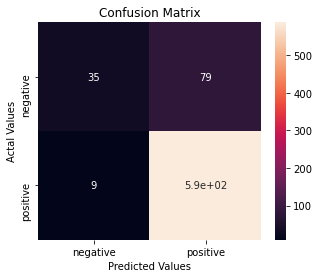

In [262]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [263]:
recall_score(y_val, prediction, average = 'weighted')

0.8760563380281691

In [264]:
print(metrics.classification_report(y_val, prediction, digits=3))

              precision    recall  f1-score   support

           0      0.795     0.307     0.443       114
           1      0.881     0.985     0.930       596

    accuracy                          0.876       710
   macro avg      0.838     0.646     0.687       710
weighted avg      0.868     0.876     0.852       710



### Tf-idf Vectorizer Multinomial Naive Bayes

In [265]:
X_train_vec, X_val_vec = prepare_transformed_datasets(TfidfVectorizer(), X_t, y_t, X_val, y_val)

In [266]:
prediction, model = train_predict_model(MultinomialNB(), X_train_vec, y_t, X_val_vec)

In [267]:
accuracy_score(y_val, prediction)

0.847887323943662

In [268]:
cm = confusion_matrix(y_val, prediction)
cm

array([[  6, 108],
       [  0, 596]])

In [270]:
cm_df = pd.DataFrame(cm,
                     index = ['negative','positive'], 
                     columns = ['negative','positive'])

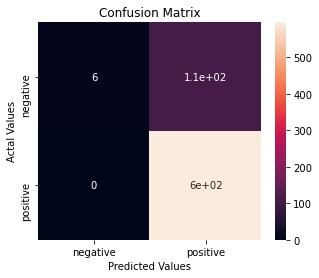

In [271]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [272]:
print(metrics.classification_report(y_val, prediction, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.053     0.100       114
           1      0.847     1.000     0.917       596

    accuracy                          0.848       710
   macro avg      0.923     0.526     0.508       710
weighted avg      0.871     0.848     0.786       710



In [277]:
prediction, model = train_predict_model(RandomForestClassifier(n_estimators=1000, max_features=100, max_depth=10), X_train_vec, y_t, X_val_vec)


In [278]:
accuracy_score(y_val, prediction)

0.8450704225352113

In [279]:
cm = confusion_matrix(y_val, prediction)
cm

array([[  4, 110],
       [  0, 596]])